# EDA и research-анализ

**Описание полей датасета:**

- ```set_id(Integer)``` – уникальный идентфикатор для каждого набора LEGO
- ```name(String)``` – название набора LEGO
- ```year(Integer)``` – год выпуска набора LEGO
- ```theme (String)``` – основная тема набора LEGO (Star Wars, City, Technic и т.д.)
- ```subtheme (String)``` – подтема набора LEGO внутри основной темы
- ```themeGroup (String)``` – классификация тем более высокого уровня
- ```category (String)``` – тип набора LEGO (например, набор кубиков, набор минифигурок)
- ```minifig(String)``` - ссылка на изображение минифигурки
- ```bricksetURL(string)``` - URL-адрес
- ```pieces(Integer)``` – количество деталей в наборе
- ```agerange_min (Integer)``` – минимальный рекомендуемый возраст
- ```US_retailPrice (Float)``` – розничная цена в долларах США
- ```imageURL (String)``` – ссылка на изображение набора

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.inspection import permutation_importance
import numpy as np

In [2]:
data = pd.read_csv('database.csv')

In [21]:
print(data.head())

  set_id                     name  year      theme     subtheme themeGroup  \
0    1-8          Small house set  1970  Minitalia          NaN    Vintage   
1    2-8         Medium house set  1970  Minitalia          NaN    Vintage   
2    3-6         Medium house set  1970  Minitalia          NaN    Vintage   
3    4-4          Large house set  1970  Minitalia          NaN    Vintage   
4    4-6  Mini House and Vehicles  1970  Samsonite  Model Maker    Vintage   

  category  pieces  minifigs  agerange_min  US_retailPrice  \
0   Normal    67.0       NaN           NaN             NaN   
1   Normal   109.0       NaN           NaN             NaN   
2   Normal   158.0       NaN           NaN             NaN   
3   Normal   233.0       NaN           NaN             NaN   
4   Normal     NaN       NaN           NaN             NaN   

                     bricksetURL  \
0  https://brickset.com/sets/1-8   
1  https://brickset.com/sets/2-8   
2  https://brickset.com/sets/3-6   
3  https://bri

In [22]:
# Получим более репрезентативную выборку наборов LEGO, исключив те, у которых количество деталей равно нулю
data = data[data['pieces'] > 0]

In [23]:
# Осуществим фильтрацию данных для получения количества наборов с количеством деталей меньше ста
less_than_100_pieces = data[data['pieces'] <= 100].shape[0]

print(f'Количество наборов с количеством деталей меньше ста: {less_than_100_pieces}')

Количество наборов с количеством деталей меньше ста: 8383


**Самый большой набор LEGO**

In [42]:
# Найдем самое большое количество деталей
max_pieces = data['pieces'].max()

# Найдем самый большой набор LEGO
bigges_set = data.loc[data['pieces'].idxmax()]

# Выведем информацию о самом большом наборе LEGO
print(f'Самый большой набор LEGO содержал {int(max_pieces)} деталей, вот информация о нем:')
print(bigges_set)

Самый большой набор LEGO содержал 11695 деталей, вот информация о нем:
set_id                                                       31203-1
name                                                       World Map
year                                                            2021
theme                                                            Art
subtheme                                               Miscellaneous
themeGroup                                            Art and crafts
category                                                      Normal
pieces                                                       11695.0
minifigs                                                         NaN
agerange_min                                                    18.0
US_retailPrice                                                249.99
bricksetURL                        https://brickset.com/sets/31203-1
thumbnailURL       https://images.brickset.com/sets/small/31203-1...
imageURL           https://image

**Самый маленький набор LEGO**

In [43]:
# Найдем минимальное значение поля 'pieces'
min_pieces = data['pieces'].min()

# Найдем название набора с минимальным количеством деталей
smallest_set = data.loc[data['pieces'].idxmin()]

# Выведем информацию о самом маленьком наборе
print(f'Самый маленький набор LEGO содержал {int(min_pieces)} деталей, вот информация о нем:')
print(smallest_set)

Самый маленький набор LEGO содержал 1 деталей, вот информация о нем:
set_id                                                         078-1
name                                        Roadway Base Plate 50X50
year                                                            1970
theme                                                      Samsonite
subtheme                                                Supplemental
themeGroup                                                   Vintage
category                                                      Normal
pieces                                                           1.0
minifigs                                                         NaN
agerange_min                                                     NaN
US_retailPrice                                                   NaN
bricksetURL                          https://brickset.com/sets/078-1
thumbnailURL        https://images.brickset.com/sets/small/078-1.jpg
imageURL           https://images.

**График 1**

**Самый распространенный диапазон количества деталей в наборах LEGO**

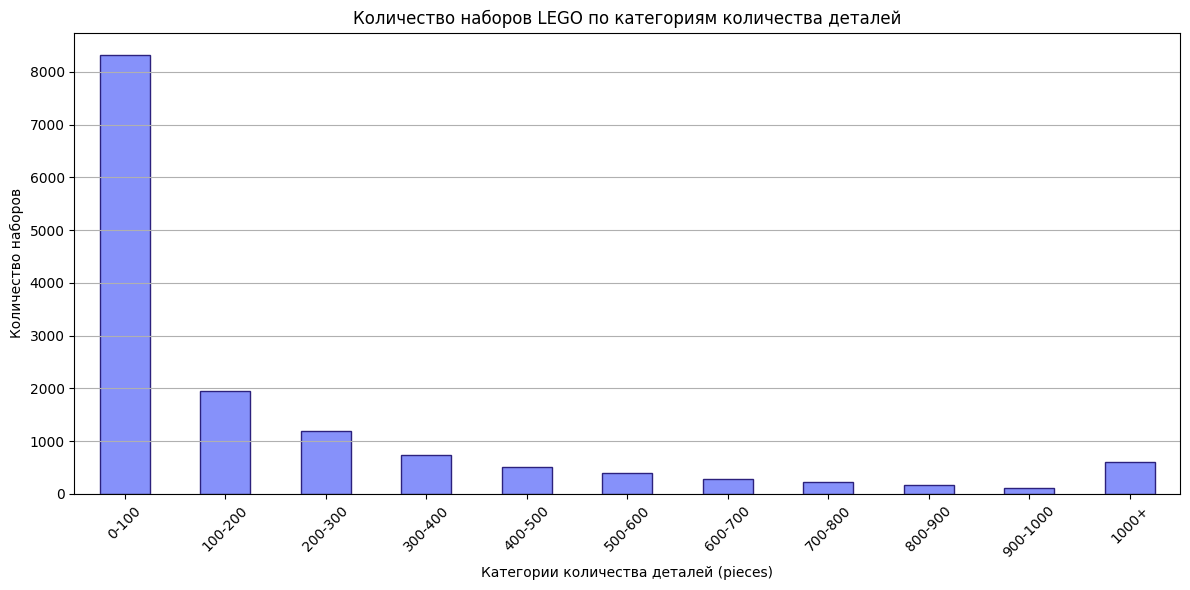

In [25]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', 
          '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+']

# Создадим категориальный столбец
data['pieces_category'] = pd.cut(data['pieces'], bins=bins, labels=labels, right=False)

# Подсчитаем количество наборов в каждой категории
category_counts = data['pieces_category'].value_counts().sort_index()

# Осуществим построение графика
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='#8691fa', edgecolor='#2c217d')
plt.title('Количество наборов LEGO по категориям количества деталей')
plt.xlabel('Категории количества деталей (pieces)')
plt.ylabel('Количество наборов')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Выведем график
plt.tight_layout()
plt.show()

**График 2**

**Зависимость стоимости набора LEGO от года выпуска**

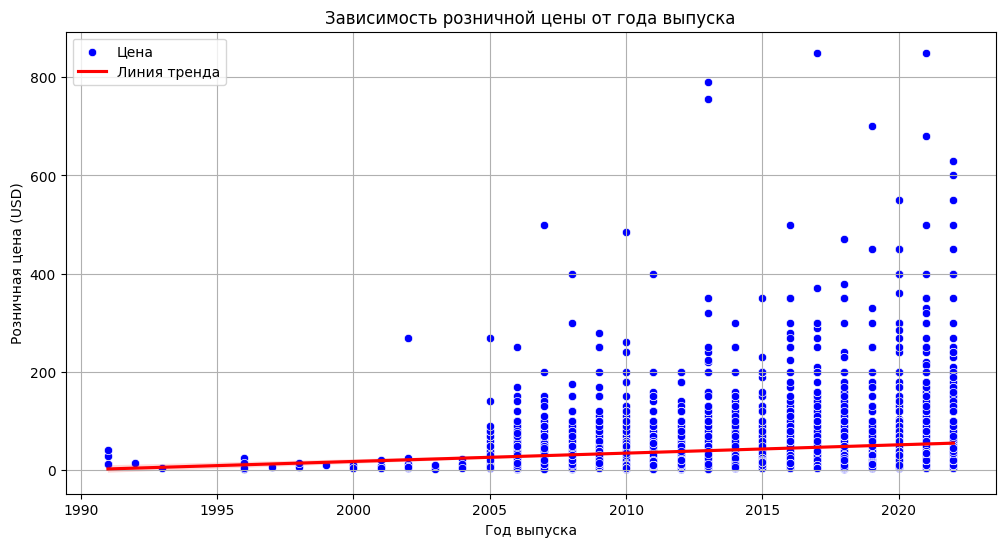

In [45]:
# Отсортируем наборы по году выпуска
data.sort_values('year', inplace=True)

# Настроим график
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='year', y='US_retailPrice', color='blue', label='Цена')

# Добавим линию тренда
sns.regplot(data=data, x='year', y='US_retailPrice', scatter=False, color='red', label='Линия тренда')

# Настроим график
plt.title('Зависимость розничной цены от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Розничная цена (USD)')
plt.legend()
plt.grid(True)

# Выведем график
plt.show()

**Самый дорогой набор LEGO**

In [30]:
# Найдем самую высокую стоимость набора LEGO
max_price = data['US_retailPrice'].max()
most_cheap_set = data.loc[data['US_retailPrice'].idxmax()]

# Выведем информацию о самом дорогом наборе LEGO
print(f'Самый дорогой набор LEGO стоил {max_price} долларов США, вот информация о нем:')
print(most_cheap_set)

Самый дорогой набор LEGO стоил 849.99 долларов США, вот информация о нем:
set_id                                                       75192-1
name                                               Millennium Falcon
year                                                            2017
theme                                                      Star Wars
subtheme                                   Ultimate Collector Series
themeGroup                                                  Licensed
category                                                      Normal
pieces                                                        7541.0
minifigs                                                         8.0
agerange_min                                                    16.0
US_retailPrice                                                849.99
bricksetURL                        https://brickset.com/sets/75192-1
thumbnailURL       https://images.brickset.com/sets/small/75192-1...
imageURL           https://im

**Самый дешевый набор LEGO**

In [112]:
# Найдем самую низкую стоимость набора LEGO
min_price = data['US_retailPrice'].min()
most_cheap_set = data.loc[data['US_retailPrice'].idxmin()]

# Выведем информацию о самом дешевом наборе LEGO
print(f'Самый дешевый набор LEGO стоил {min_price} долларов США, вот информация о нем:')
print(most_cheap_set)

Самый дешевый набор LEGO стоил 1.99 долларов США, вот информация о нем:
set_id                                                        8934-1
name                                                      Squid Ammo
year                                                            2007
theme                                                       Bionicle
subtheme                                                 Accessories
themeGroup                                              Constraction
category                                                      Normal
pieces                                                           7.0
minifigs                                                         NaN
agerange_min                                                     NaN
US_retailPrice                                                  1.99
bricksetURL                         https://brickset.com/sets/8934-1
thumbnailURL       https://images.brickset.com/sets/small/8934-1.jpg
imageURL           https://imag

**График 3**

**Топ-10 тем LEGO по количеству наборов**

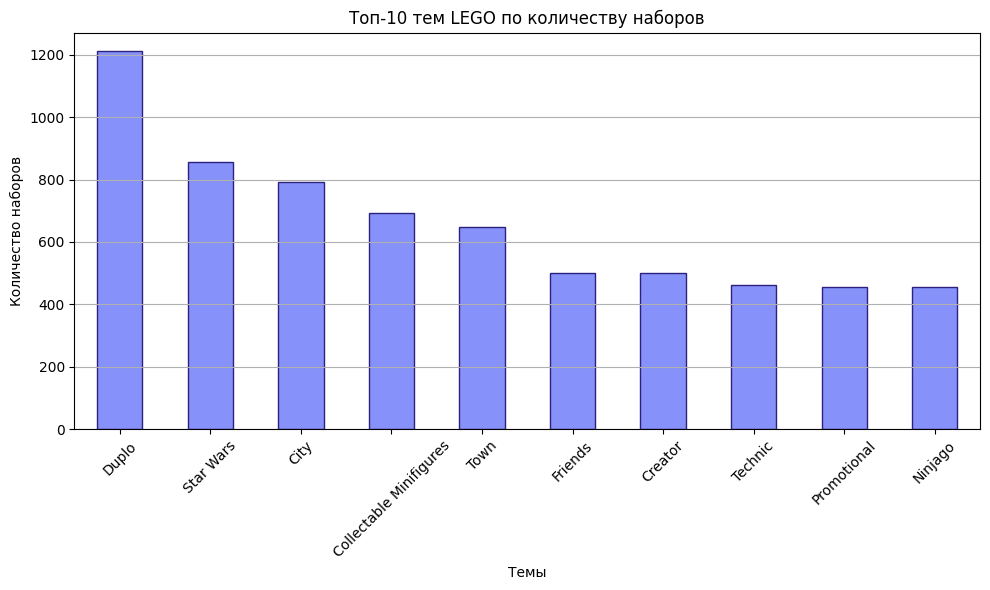

In [31]:
# Отсортируем темы по убыванию количества содержащихся в них наборов
theme_counts = data['theme'].value_counts()

# Получим топ-10 тем
top_10_themes = theme_counts.head(10)

# Настроим диаграмму
plt.figure(figsize=(10, 6))
top_10_themes.plot(kind='bar', color='#8691fa', edgecolor='#2c217d')
plt.title('Топ-10 тем LEGO по количеству наборов')
plt.xlabel('Темы')
plt.ylabel('Количество наборов')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Выведем диаграмму
plt.tight_layout()
plt.show()

**График 4**

**Возрастные категории наборов LEGO**

In [75]:
# Создадим сводную таблицу с информацией о рекомандованном возрасте и количестве соответствующих определенной возрастной маркировке наборов
pd.pivot_table(data, index='agerange_min', values='name', aggfunc='count').reset_index()

,agerange_min,name
0,1.0,81
1,2.0,287
2,3.0,40
3,4.0,267
4,5.0,1477
5,6.0,1363
6,7.0,1152
7,8.0,775
8,9.0,275
9,10.0,275


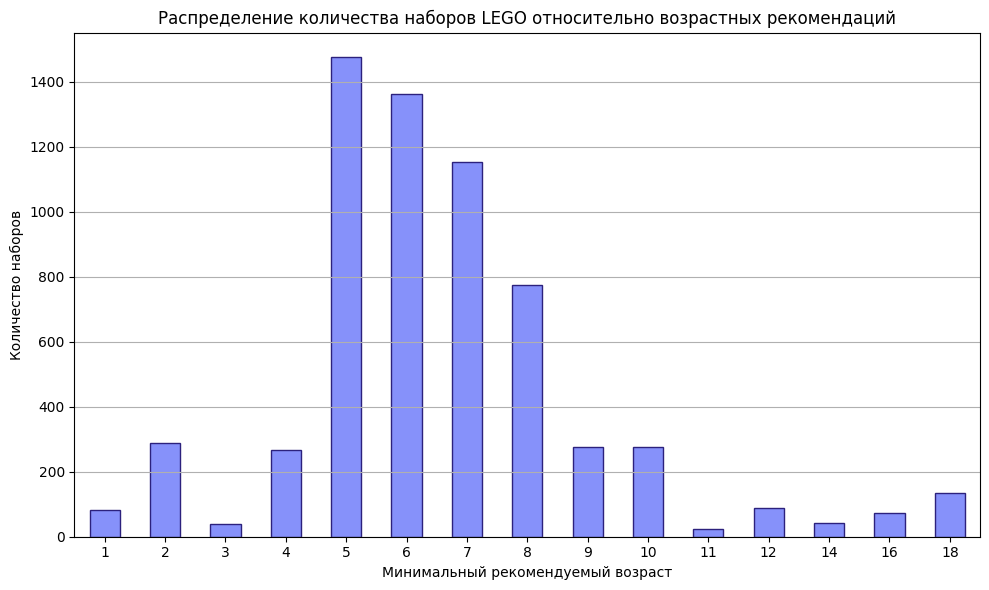

In [32]:
# Подсчитаем количество наборов по возрастным группам
age_counts = data['agerange_min'].value_counts().sort_index()

# Создадим столбчатую диаграмму
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='#8691fa', edgecolor='#2c217d')
plt.grid(axis='y')

# Настроим график
plt.title('Распределение количества наборов LEGO относительно возрастных рекомендаций')
plt.xlabel('Минимальный рекомендуемый возраст')
plt.ylabel('Количество наборов')

# Установим целочисленные значения по оси X, так как работаем с возрастом в качестве значений
plt.xticks(ticks=range(len(age_counts)), labels=age_counts.index.astype(int), rotation=0)

# Выведем график
plt.tight_layout()
plt.show()

**График 5**

**Количество деталей в зависимости от возрастных рекомендаций**

In [84]:
# Создадим сводную таблицу с информацией о среднем количестве деталей в наборах с определенными возрастными маркировками
pd.pivot_table(data, index='agerange_min', values='pieces', aggfunc='mean').reset_index().sort_values(by='agerange_min').reset_index(drop=True)

,agerange_min,pieces
0,1.0,32.271605
1,2.0,49.331010
2,3.0,74.800000
3,4.0,232.456929
4,5.0,82.165200
5,6.0,141.465150
6,7.0,232.105035
7,8.0,464.403871
8,9.0,801.734545
9,10.0,502.869091


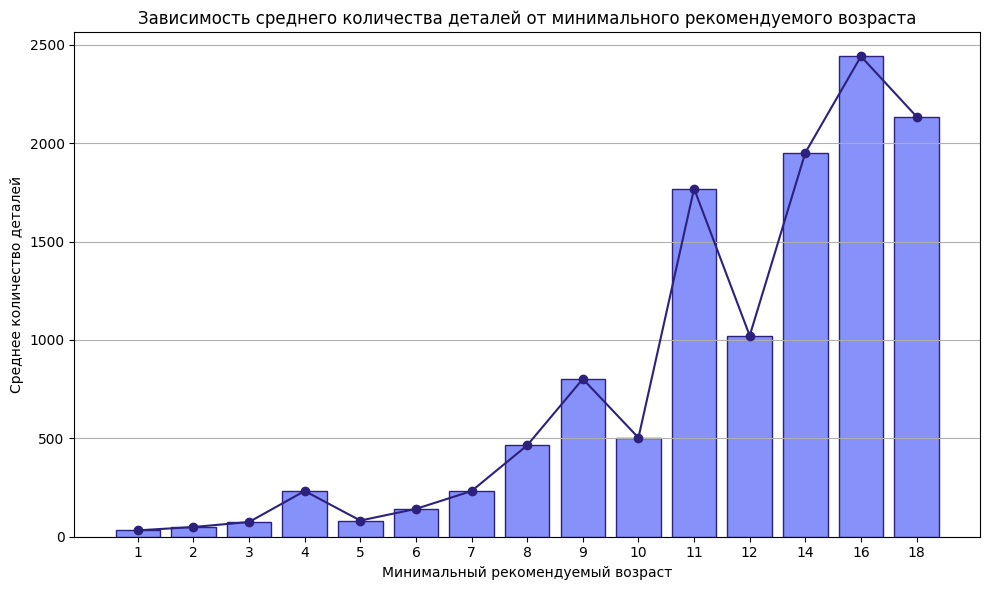

In [34]:
# Предполагаем, что data уже загружен
pivot_table = data.pivot_table(index='agerange_min', values='pieces', aggfunc='mean').reset_index()
pivot_table.columns = ['agerange_min', 'average_pieces']
pivot_table = pivot_table.sort_values(by='agerange_min').reset_index(drop=True)

# Построим график
plt.figure(figsize=(10, 6))

# Используем позиции для равномерного распределения
x_positions = np.arange(len(pivot_table['agerange_min']))
bar_width = 0.8  # Ширина столбцов

# Зададим цвет для графика
plt.bar(x_positions, pivot_table['average_pieces'], width=bar_width, color='#8691fa', edgecolor='#2c217d')

# Нарисуем линию
plt.plot(x_positions, pivot_table['average_pieces'], color='#2c217d', marker='o')

# Настроим график
plt.title('Зависимость среднего количества деталей от минимального рекомендуемого возраста')
plt.xlabel('Минимальный рекомендуемый возраст')
plt.ylabel('Среднее количество деталей')
plt.grid(axis='y')

# Убедимся, что метки оси X - целые числа
plt.xticks(x_positions, labels=[int(x) for x in pivot_table['agerange_min']])

# Выведем график
plt.tight_layout()
plt.show()